In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

# Plotting Data

<function matplotlib.pyplot.show(*args, **kw)>

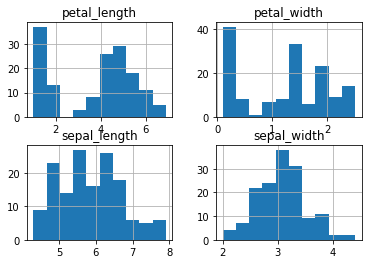

In [5]:
df.hist()
plt.show

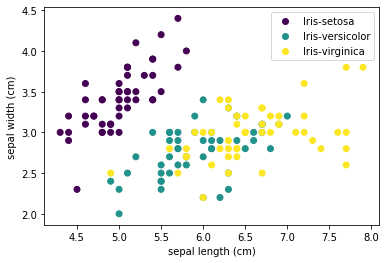

In [6]:
# build a dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0, 
  'Iris-versicolor': 1,
  'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in df['species']] 
# scatter plot
scatter = plt.scatter(df['sepal_length'], df['sepal_width'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

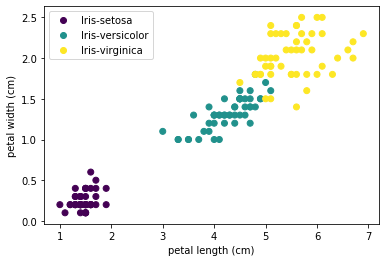

In [7]:
# scatter plot
scatter = plt.scatter(df['petal_length'], df['petal_width'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

In [8]:
corr_matrix = df.corr().round(2)
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.11          0.87         0.82
sepal_width          -0.11         1.00         -0.42        -0.36
petal_length          0.87        -0.42          1.00         0.96
petal_width           0.82        -0.36          0.96         1.00


Using petal_length and petal_width is better than sepal one

# Modelling

In [9]:
X = df[['petal_length' , 'petal_width']]
Y = df['species']

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 1 , stratify = Y)
print(Y_train.value_counts())
print(Y_test.value_counts())

Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: species, dtype: int64
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: species, dtype: int64


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn.fit(X_train , Y_train)

KNeighborsClassifier()

# Prediction

In [13]:
pred = knn.predict(X_test)
pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [14]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]   #predicted prbabilities of 11th and 12th flower

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [15]:
pred[10:12]

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

# Evaluation

In [16]:
print((pred==Y_test.values).sum())
print(Y_test.size)

44
45


The model made one error so the accuracy is 44/45

In [17]:
print((pred == Y_test.values).sum()/Y_test.size)

0.9777777777777777


In [18]:
knn.score(X_test, Y_test)

0.9777777777777777

In [19]:
#Confusion matrix
confusion_matrix(Y_test, pred, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

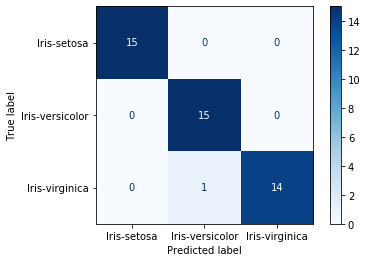

In [20]:
plot_confusion_matrix(knn, X_test, Y_test, cmap=plt.cm.Blues);

# K-fold Cross Validation

In [22]:
knn_cv = KNeighborsClassifier(n_neighbors = 3)

In [23]:
cv_scores = cross_val_score(knn_cv , X , Y , cv = 5)

In [24]:
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [25]:
cv_scores.mean()

0.9533333333333334

In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

# Grid Search

When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. In scikit-learn, we use GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.

In [27]:
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [28]:
knn_gscv.best_params_   #To check the top performing K

{'n_neighbors': 4}

In [29]:
knn_gscv.best_score_

0.9666666666666668

By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%

# Making a new model by grid search result

In [30]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, Y)
y_pred = knn_final.predict(X)
knn_final.score(X, Y)

0.9733333333333334

knn_final will be our final model to use for data

# Label Prediction with New Data

In [31]:
new_data = np.array([3.76, 1.20])
new_data = new_data.reshape(1,-1)
knn_final.predict(new_data)

array(['Iris-versicolor'], dtype=object)

In [32]:
new_data1 = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
knn_final.predict(new_data1)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [33]:
knn_final.predict_proba(new_data1)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])